**Nikolas Moustakidis**

**AEM: 3743**

**KNN:**

The K-Nearest Neighbors algorithm, also known as KNN is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

KNN is a non-parametric algorithm because it does not assume anything about the training data. This makes it useful for problems having non-linear data.

KNN can be computationally expensive both in terms of time and storage if the data is very large because KNN has to store the training data to work. This is generally not the case with other supervised learning models.

**KNN Steps:**

1.   Calculate the distance between the data sample and every other sample with the help of a distance calculation method such as Euclidean
2. Sort these values of distances in ascending order
3. Choose the top K values from the sorted distances
4. Assign the class to the sample based on the most frequent class in the above K values

**Nearest Centroid:**

In machine learning, a nearest centroid classifier or nearest prototype classifier is a classification model that assigns to observations the label of the class of training samples whose mean (centroid) is closest to the observation.

**NC Steps:**

1. The centroid for each target class is computed while training
2. After training given any point, say ‘X’ the distances between the point X and each class’ centroid is calculated
3. Out of all the calculated distances, the minimum distance is picked. The centroid to which the given point’s distance is minimum, it’s class is assigned to the given point


**Importing all the appropriate libraries**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix
from collections import Counter


import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import tarfile
import pickle
import os

**Downloading the CIFAR-10 dataset**
*   Creating directory to store the batches of data
*   Downloading the CIFAR 10 dataset from the internet
*   Extracting the data from the downloaded compressed file

In [ ]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "./data"

dataset_name = url.split('/')[-1]
dataset_path = os.path.join(download_dir, dataset_name)

if not os.path.exists(dataset_path):
  if not os.path.exists(download_dir):
    os.makedirs(download_dir)

  print("Downloading dataset...")
  dataset_path, _ = urllib.request.urlretrieve(url=url, filename=dataset_path)

  print("Extracting files...")
  tarfile.open(name=dataset_path, mode="r:gz").extractall(download_dir)

  print('Done')
else:
  print("Dataset has already been downloaded and unpacked.")

Dataset has already been downloaded and unpacked.



**Loading the whole CIFAR dataset**
*   For the train set I appended all the training batches
*   X_train contains all the image data for training 
*   Y_train contains all the corresponding labels of the training image data
*   For the test set I used the test_batch
*   X_test contains all the image data for testing
*   Y_test contains all the corresponding labels of the testing image data

In [ ]:
cifar10_dir = './data/cifar-10-batches-py'

X_train_list = []
Y_train_list = []

for batch in range(1,6):
  batch_file = os.path.join(cifar10_dir, 'data_batch_%d' % (batch, ))
  
  with open(batch_file, 'rb') as f:
    data_dict = pickle.load(f, encoding='latin1')

    X_batch = data_dict['data']
    Y_batch = data_dict['labels']
    X_batch = X_batch.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y_batch = np.array(Y_batch)

  X_train_list.append(X_batch)
  Y_train_list.append(Y_batch)    

X_train = np.concatenate(X_train_list)
Y_train = np.concatenate(Y_train_list)

test_batch_path = os.path.join(cifar10_dir, 'test_batch')

with open(test_batch_path, 'rb') as f:
    data_dict = pickle.load(f, encoding='latin1')

    X_batch = data_dict['data']
    Y_batch = data_dict['labels']
    X_batch = X_batch.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y_batch = np.array(Y_batch)

X_test = X_batch
Y_test = Y_batch

print('Succesfully loaded train and test data')
print('--------------------------------------')
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

Succesfully loaded train and test data
--------------------------------------
X_train shape:  (50000, 32, 32, 3)
Y_train shape:  (50000,)
X_test shape:  (10000, 32, 32, 3)
Y_test shape:  (10000,)


**Making sure my dataset is balanced along the 10 classes (0 to 9 where zero is equal to plane and 9 is equal to truck, and so on so forth)**

In [ ]:
train_occurences = Counter(Y_train)
test_occurences = Counter(Y_test)

print(train_occurences)
print(test_occurences)

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


**Visualizing a few random dataset samples from each class**




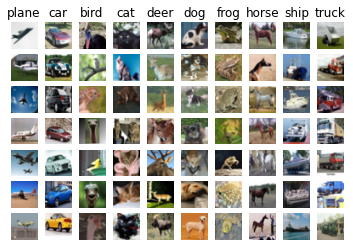

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = len(classes)
samples_per_class = 7
for cls_index, cls in enumerate(classes):
  idxs = np.flatnonzero(Y_train == cls_index)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + cls_index + 1
    plt.subplot(samples_per_class, num_classes, plt_idx)
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    if i == 0:
      plt.title(cls)
plt.show()

**Subset of Dataset vs Whole Dataset:**

As expected training on a smaller amount of data had a negative impact in the overall performace of both the KNN and the Nearest Centroid classifier. That doesn't mean that always more data means better results because this could result in overfitting where basically the model cannot generalize and fits too closely to the training dataset instead

**Shuffling vs No Shuffling:**

On the other hand, shuffling didn't affect the results in neither of the two classifiers, which of course we expected in both cases as the classifiers rely on the distances and not on the order of the samples. More specifically the KNN algorithm will scan the entire training set for a single prediction and NC will also scan the entire training set to compute the centroids of the classes.

In [ ]:
train_test_on_subset = False
shuffle_train_data = False

if train_test_on_subset:
  num_training = 10000
  num_test = 1000
else:
  num_training = len(X_train)
  num_test = len(X_test)

if shuffle_train_data:
  train_mask = np.random.permutation(num_training)
else:
  train_mask = np.arange(num_training)

X_train = X_train[train_mask]
Y_train = Y_train[train_mask]

test_mask = np.arange(num_test)

X_test = X_test[test_mask]
Y_test = Y_test[test_mask]

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (50000, 32, 32, 3)
Y_train shape:  (50000,)
X_test shape:  (10000, 32, 32, 3)
Y_test shape:  (10000,)


Formating the data appropriately in order to feed them in the classifier

**[N_Samples, Height, Width, Channels] -> [N_Samples, N_Features]**

In [ ]:
# Reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (50000, 3072)
X_test shape:  (10000, 3072)


**Training and testing the KNN classifier with one neighbor (k=1) and printing the performance metrics**






In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

knn_classifier.fit(X_train, Y_train)

y_test_pred = knn_classifier.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_test_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Performace metrics:\n', classification_report(Y_test, y_test_pred, target_names=classes))

Confusion Matrix:
 [[485  16 109  20  73  20  31  11 221  14]
 [107 218  81  55 131  54  74  29 204  47]
 [ 84   0 384  61 244  57  94  16  55   5]
 [ 44   5 168 240 152 148 140  41  49  13]
 [ 58   4 216  51 457  48  85  25  54   2]
 [ 49   3 162 144 148 290 112  30  51  11]
 [ 27   2 193  79 239  56 353  11  36   4]
 [ 64  12 143  62 201  66  86 294  56  16]
 [117  19  50  42  77  22  24  13 619  17]
 [109  57  78  69 112  37  76  56 207 199]]
Performace metrics:
               precision    recall  f1-score   support

       plane       0.42      0.48      0.45      1000
         car       0.65      0.22      0.33      1000
        bird       0.24      0.38      0.30      1000
         cat       0.29      0.24      0.26      1000
        deer       0.25      0.46      0.32      1000
         dog       0.36      0.29      0.32      1000
        frog       0.33      0.35      0.34      1000
       horse       0.56      0.29      0.39      1000
        ship       0.40      0.62      0.4

**Training and testing the KNN classifier with three neighbor (k=3) and printing the performance metrics**

In [ ]:
# Performing K-NN with three neighbors

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, Y_train)

y_test_pred = knn_classifier.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_test_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Performace metrics:\n', classification_report(Y_test, y_test_pred, target_names=classes))

Confusion Matrix:
 [[573   9 109  19  48   6  22   5 204   5]
 [196 243 125  61 113  29  37   6 168  22]
 [156   7 450  54 197  30  59   7  39   1]
 [102  11 281 225 147  91  89  14  33   7]
 [104   5 291  55 436  21  36  12  40   0]
 [100   5 249 172 144 213  68  11  34   4]
 [ 49   5 327  89 252  27 229   2  20   0]
 [131  20 217  73 235  38  41 199  44   2]
 [183  30  52  42  51  14   9   3 612   4]
 [193  87 128  76 110  27  43  13 200 123]]
Performace metrics:
               precision    recall  f1-score   support

       plane       0.32      0.57      0.41      1000
         car       0.58      0.24      0.34      1000
        bird       0.20      0.45      0.28      1000
         cat       0.26      0.23      0.24      1000
        deer       0.25      0.44      0.32      1000
         dog       0.43      0.21      0.28      1000
        frog       0.36      0.23      0.28      1000
       horse       0.73      0.20      0.31      1000
        ship       0.44      0.61      0.5

**Training and testing the Nearest Centroid classifier and printing the performance metrics**

In [ ]:
# Performing Nearest Centroid

nc_classifier = NearestCentroid()

nc_classifier.fit(X_train, Y_train)

y_test_pred = nc_classifier.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_test_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Performace metrics:\n', classification_report(Y_test, y_test_pred, target_names=classes))

Confusion Matrix:
 [[539  54  23  14  19  40  73  18 146  74]
 [149 186  11  18  30  56 254  39  87 170]
 [254  46 107  12  65  78 310  58  29  41]
 [171  31  38  56  29 185 313  75  21  81]
 [107  30  78  14 119 101 394  69  29  59]
 [167  22  45  40  37 286 246  68  40  49]
 [114  34  44  19  23  90 538  82   5  51]
 [148  46  19  20  78 107 192 166  46 178]
 [215  90   7   9  11  92  55  12 370 139]
 [152 118   6   9  21  30 110  35 112 407]]
Performace metrics:
               precision    recall  f1-score   support

       plane       0.27      0.54      0.36      1000
         car       0.28      0.19      0.22      1000
        bird       0.28      0.11      0.16      1000
         cat       0.27      0.06      0.09      1000
        deer       0.28      0.12      0.17      1000
         dog       0.27      0.29      0.28      1000
        frog       0.22      0.54      0.31      1000
       horse       0.27      0.17      0.20      1000
        ship       0.42      0.37      0.3

**Final Thoughts**

The performance of the classifiers (KNN and NC) is not ideal by any means. The classification performance metrics speak for themselves as all of them are below 50% with a complete amount-wise and balanced dataset. The biggest issue behind that bad performance is probably in the logic in which the classifiers are designed to work.

* Both classifiers rely on a distance metric to classify the images. This is a 
problem because they suppose that two inputs that are close (in distance) should belong to the same class and when this is violated both KNN and NC underperform

* Euclidean distance between RGB seems fairly meaningless. Two pictures are likely the “same” if we rotate it, adjust the color/saturation/hue, change foreground/background - but all these are considered different under euclidean distance between RGB pixels

* The dimension of each picture 3072=32×32×3 is likely too high, and curse of dimensionality kicks in

Finally I believe that we could boost a bit the performance of the classifiers (maybe to an accuracy of 50-60%) by performing k-fold cross validation on KNN for varying values of k to find the optimal number of neighbors

**Nearest Centroid Predictions**

**Printing a few sample predictions of NC and their ground truth labels where the classifier makes both right and wrong predictions**

**Similar results are obtained with KNN**

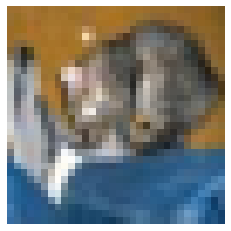


Predicted Class:  frog
Ground Truth Class:  cat
--------------------




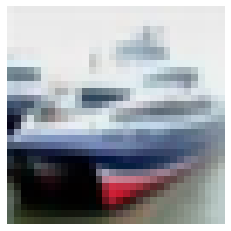


Predicted Class:  ship
Ground Truth Class:  ship
--------------------




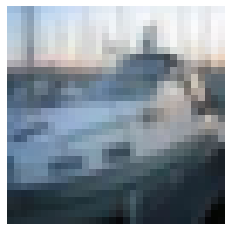


Predicted Class:  ship
Ground Truth Class:  ship
--------------------




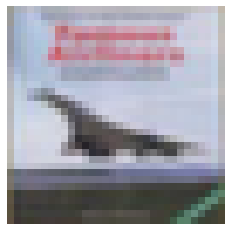


Predicted Class:  ship
Ground Truth Class:  plane
--------------------




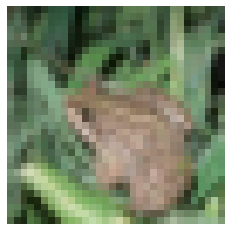


Predicted Class:  dog
Ground Truth Class:  frog
--------------------




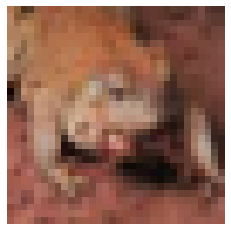


Predicted Class:  frog
Ground Truth Class:  frog
--------------------




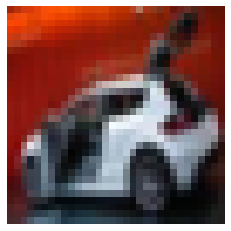


Predicted Class:  frog
Ground Truth Class:  car
--------------------




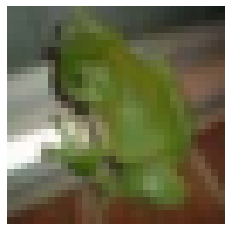


Predicted Class:  frog
Ground Truth Class:  frog
--------------------




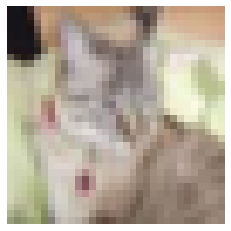


Predicted Class:  plane
Ground Truth Class:  cat
--------------------




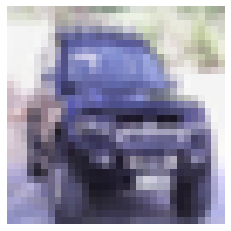


Predicted Class:  ship
Ground Truth Class:  car
--------------------




In [ ]:
predictions_to_print = 10
X_test = np.reshape(X_test, (X_test.shape[0],32,32,-1))

for idx in range(predictions_to_print):
  plt.imshow(X_test[idx].astype('uint8'))
  plt.show(plt.axis('off'))
  print('\nPredicted Class: ', classes[y_test_pred[idx]])
  print('Ground Truth Class: ', classes[Y_test[idx]])
  print('--------------------\n\n')